In [ ]:
from task_tracker.trial_components import Trial
from task_tracker.interfaces import Main_Interface
from task_tracker.utils import load_trial, get_colors
import seaborn as sns
from pathlib import Path

### You start by creating a dictionary for all tasks you want to track.

#### Tasks that will be running in parallel, should get different keys.

> For our lasagne recipe you need the kitchen appliances`oven`, `stove` and `chopping board`. You also need a `pan` and a `casserole`.

> You might use the `casserole` and the `oven` at the same time, so they should be set to different keys. In our example: `Kitchen appliances` and `Forms`.

In [ ]:
tasks_dict = {"Kitchen appliances": ["Oven", "Stove", "Chopping board"],
              "Ingredients": ["Onions", "Carrots", "Tomatoes", "Grated Cheese", "Cream", "Lasagne sheets", "Butter"],
              "Utensils": ["Cooking spoon", "Knife", "Potholder"],
              "Forms": ["Pan", "Casserole"]
             }

### In case, you want to track some demographics, you can create them here. 

#### You need to specify a description, the widget type and the values. You can find a list of supported widgets [here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html).

> We want to know, how long the recipe takes and how hard it is to cook it.

> Therefore we need the variables `Duration` and `Level`. `Duration` should be a free `Text` widget, `Level` should be a `Dropdown`. A `Text` doesn't need a value, but the `Dropdown` requires a list of the options to choose from. In our case `Easy`, `Medium` and `Hard`.

In [ ]:
demographics_descriptions = ["Duration", "Level"]
demographic_widgets = ["Text", "Dropdown"]
widget_values = ["", ["No answer", "Easy", "Medium", "Hard"]]
demographics = {"descriptions": demographics_descriptions, "widget_types": demographic_widgets, "values": widget_values}

#### Executing the next cell is not necessary, however, it guarantees you the same color in the plots in all of your trials.

In [ ]:
all_tasks = []
for l in tasks_dict.values():
    all_tasks +=l
colors = get_colors(all_tasks)
colors["Pause"] = sns.colors.xkcd_rgb["grey"]

#### Now you create a *Trial* object. 

##### You have to pass in a *user_ID*, the *task_dict*, the *demographic_dict* and you can specify the *colors* and the *target_dir*, where the output files will be created. 

> The user_ID in our case is `Chef`.

In [ ]:
trial = Trial(user_ID="Chef", task_dict=tasks_dict, demographic_dict=demographics, colors = colors, target_dir=Path(""))

#### With the next cell you launch the task_tracker interface. 

In [ ]:
main = Main_Interface(trial)
main.gui

##### If you don't want to process your *Trial* right after recording, you can load it at any time with the function *load_trial*.

> Pass the name of the folder, that contains your trial into the function `2023-08-07_17.43.23_0000_Chef` in our case.

In [ ]:
trial = load_trial("2023-08-07_17.43.23_0000_Chef")

TypeError: a number is required

#### To create the results, run the cell below. The results will be returned and saved to the trials' root dir.

##### If you have a long `Audio_Record`, this might take a while!

In [ ]:
tasks_dataframe, cum_d, dataframe_per_subtasks, plots, subtask_plots, metadata_df = trial.export_results()

OSError: FLAC conversion utility not available - consider installing the FLAC command line application by running `apt-get install flac` or your operating system's equivalent

#### After exporting, you can inspect the results right here in the notebook.

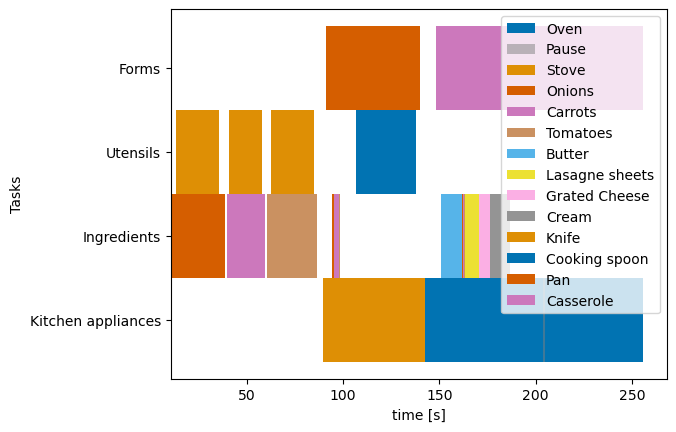

In [ ]:
plots['timeline']

In [ ]:
tasks_dataframe

,lane,duration_in_s,task_number,task_name,start_time,end_time,description_0
0,Kitchen appliances,1.3528,12,Pause,203.6099,204.9627,220°C
1,Kitchen appliances,52.8952,6,Stove,89.5415,142.4367,NaN
2,Kitchen appliances,111.9687,12,Oven,142.4370,255.7585,220°C
3,Ingredients,28.0470,0,Onions,10.3749,38.4219,NaN
4,Ingredients,19.8456,2,Carrots,39.5850,59.4306,NaN
5,Ingredients,25.9376,4,Tomatoes,60.5086,86.4462,NaN
6,Ingredients,0.6200,8,Onions,94.4853,95.1053,NaN
7,Ingredients,2.5634,9,Carrots,95.1055,97.6689,NaN
8,Ingredients,0.9346,10,Tomatoes,97.6692,98.6038,NaN
9,Ingredients,10.8963,14,Butter,150.7643,161.6606,NaN


In [ ]:
dataframe_per_subtasks

,Stove,Oven,Onions,Carrots,Tomatoes,Butter,Lasagne sheets,Grated Cheese,Cream,Knife,Cooking spoon,Pan,Casserole
Onions,0.6200,0.4513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.1578,NaN,0.6200,0.4513
Carrots,2.5634,0.5885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.7648,NaN,2.5634,0.5885
Tomatoes,0.9346,0.7091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.4024,NaN,0.9346,0.7091
Cooking spoon,31.1201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.1201,NaN
Pan,48.6670,NaN,0.6200,2.5634,0.9346,NaN,NaN,NaN,NaN,NaN,31.1201,NaN,NaN
Pause,NaN,1.3528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3528
Butter,NaN,10.8963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.8963
Lasagne sheets,NaN,6.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.9807
Grated Cheese,NaN,6.0157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0157
Cream,NaN,10.4613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.4613


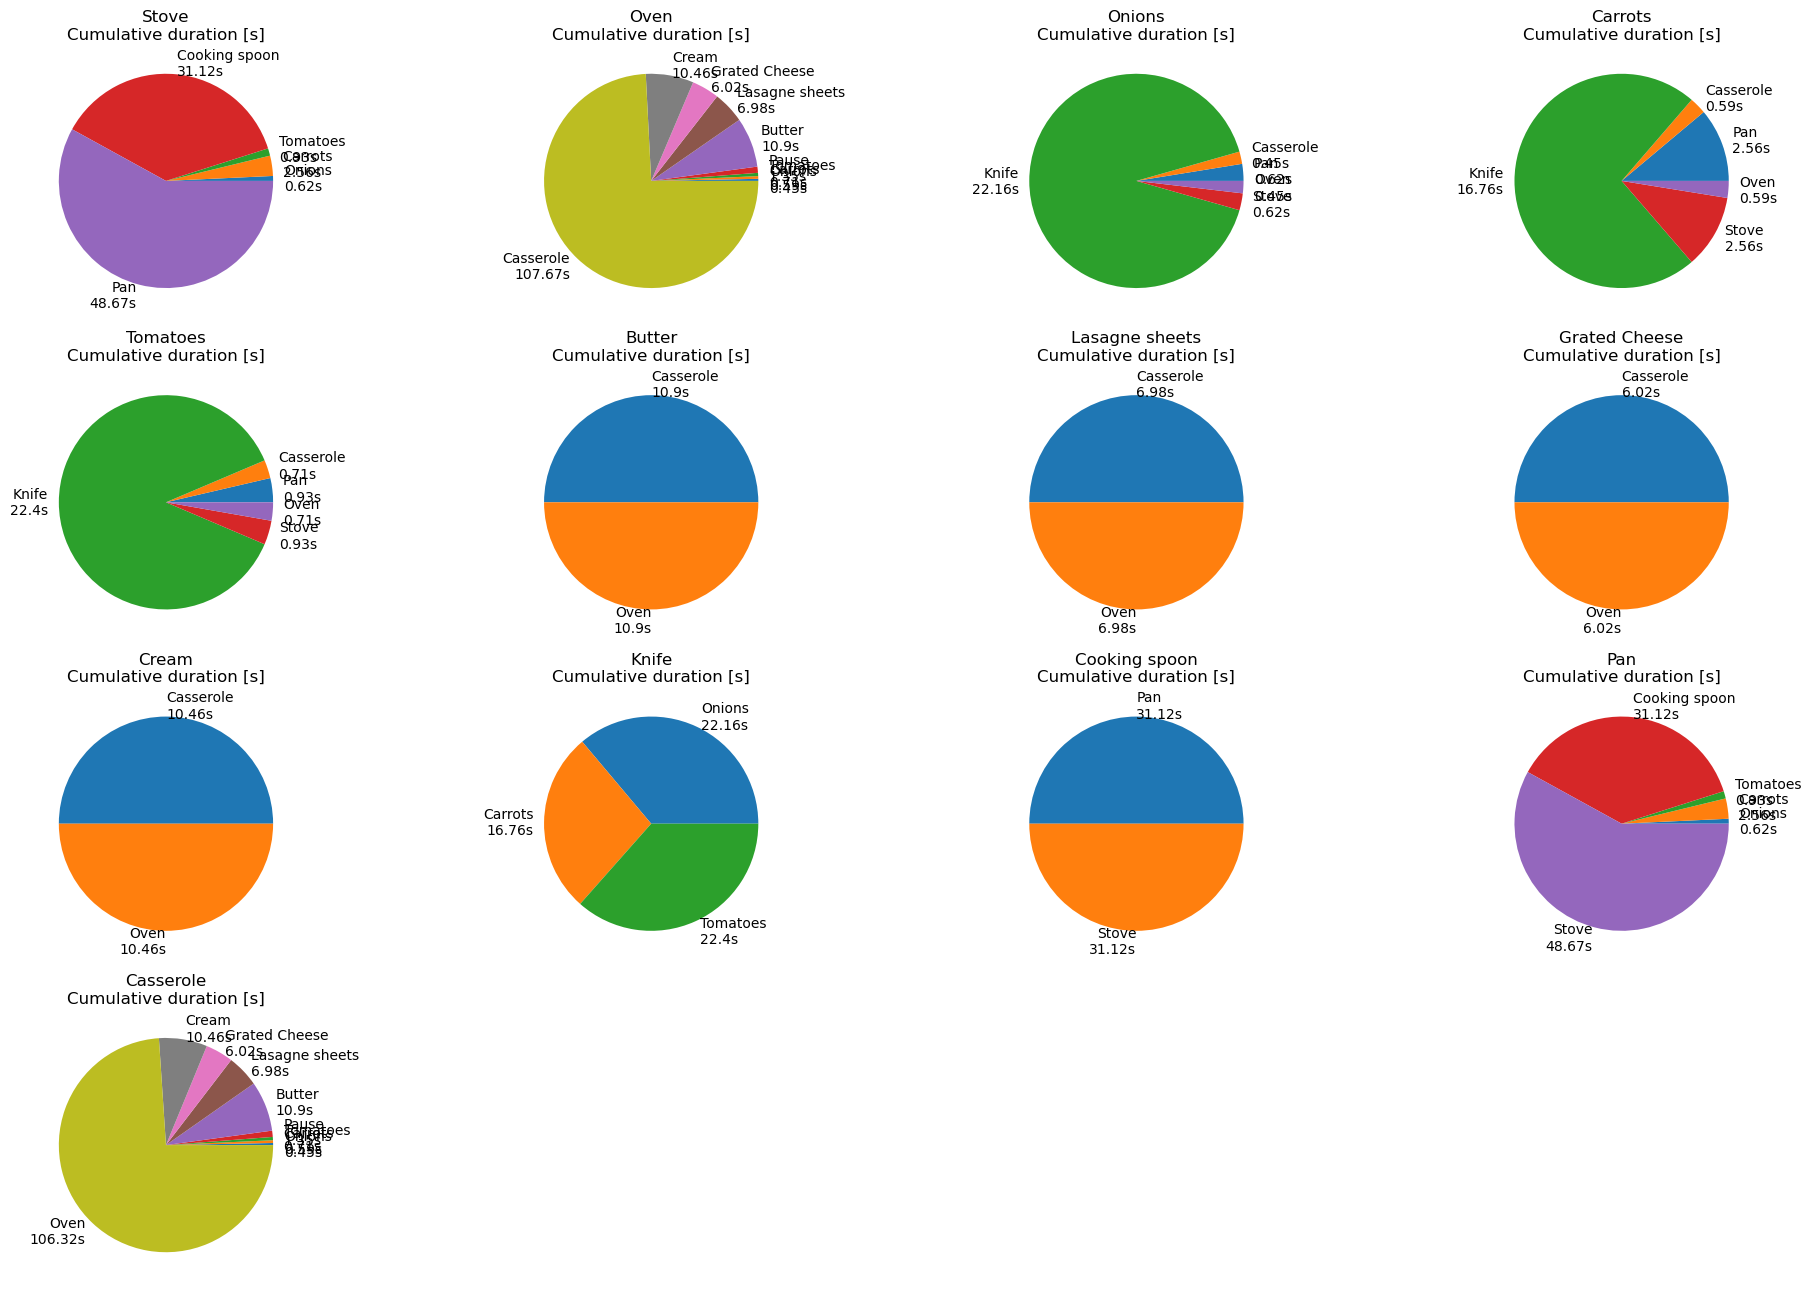

In [ ]:
subtask_plots['pie_plots_per_lane']

In [ ]:
metadata_df

,Duration,Level
0000,45,Medium
